<a href="https://colab.research.google.com/github/Muppidathe/ml_project/blob/master/excersice1(polynomial_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
df=pd.read_csv("predicting_employee_productivity.csv")
df.head()

,Weekly_Work_Hours,Stress_Level_Score,Productivity_Score
0,-10.000000,-2.509198,1.0
1,-9.797980,9.014286,1.0
2,-9.595960,4.639879,1.0
3,-9.393939,1.973170,1.0
4,-9.191919,-6.879627,1.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekly_Work_Hours   100 non-null    float64
 1   Stress_Level_Score  100 non-null    float64
 2   Productivity_Score  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [49]:
df.drop_duplicates()

,Weekly_Work_Hours,Stress_Level_Score,Productivity_Score
0,-10.000000,-2.509198,1.0
1,-9.797980,9.014286,1.0
2,-9.595960,4.639879,1.0
3,-9.393939,1.973170,1.0
4,-9.191919,-6.879627,1.0
...,...,...,...
95,9.191919,-0.124088,1.0
96,9.393939,0.454657,1.0
97,9.595960,-1.449180,1.0
98,9.797980,-9.491617,1.0


In [50]:
df.describe()

,Weekly_Work_Hours,Stress_Level_Score,Productivity_Score
count,1.000000e+02,100.000000,100.000000
mean,-7.105427e-17,-0.596385,0.869980
std,5.860907e+00,5.949788,0.228593
min,-1.000000e+01,-9.889558,0.132815
25%,-5.000000e+00,-6.135985,0.853285
50%,0.000000e+00,-0.717151,0.995306
75%,5.000000e+00,4.604062,0.999983
max,1.000000e+01,9.737739,1.000000


# Noramlity checking

<Axes: xlabel='Weekly_Work_Hours', ylabel='Count'>

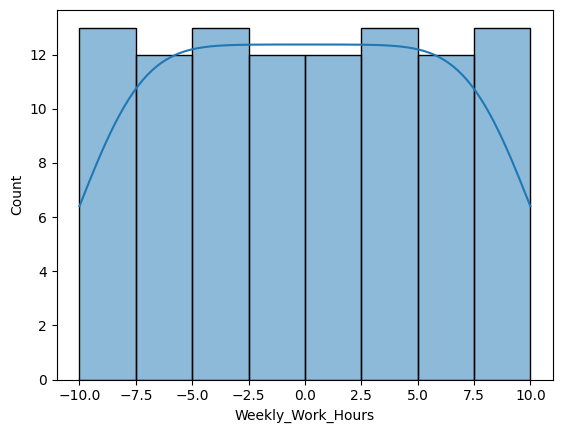

In [51]:
import seaborn as sns
sns.histplot(data=df,x='Weekly_Work_Hours',kde=True)

<Axes: xlabel='Stress_Level_Score', ylabel='Count'>

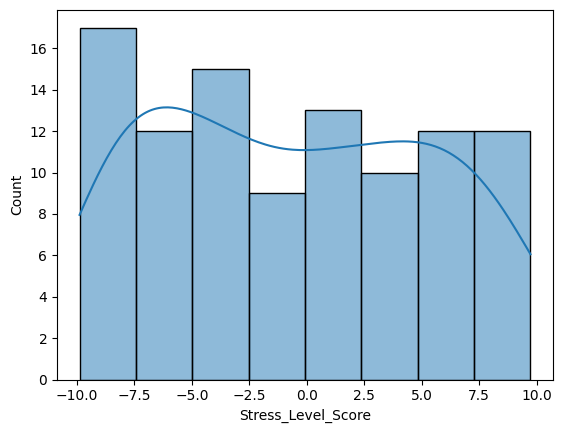

In [52]:
sns.histplot(data=df,x='Stress_Level_Score',kde=True)

<Axes: xlabel='Productivity_Score', ylabel='Count'>

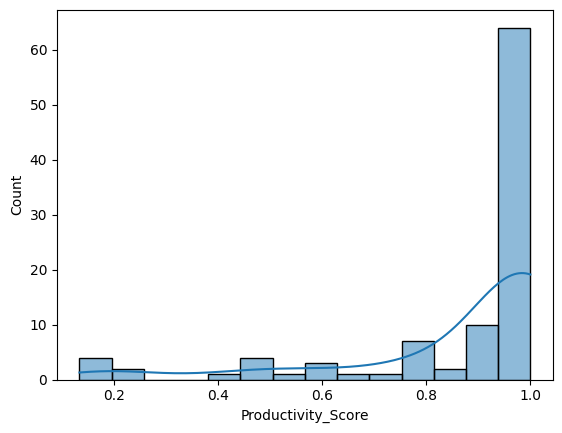

In [67]:
sns.histplot(data=df,x='Productivity_Score',kde=True)

In [54]:
from scipy.stats import anderson
res=anderson(df['Weekly_Work_Hours'],dist='norm')
if(res.statistic<res.critical_values[2]):
    print("Normal")
else:
    print("Not Normal")

Not Normal


In [55]:
res=anderson(df['Stress_Level_Score'],dist='norm')
if(res.statistic<res.critical_values[2]):
    print("Normal")
else:
    print("Not Normal")

Not Normal


In [56]:
res=anderson(df['Productivity_Score'],dist='norm')
if(res.statistic<res.critical_values[2]):
    print("Normal")
else:
    print("Not Normal")

Not Normal


# checking for linear relationship

<Axes: xlabel='Weekly_Work_Hours', ylabel='Productivity_Score'>

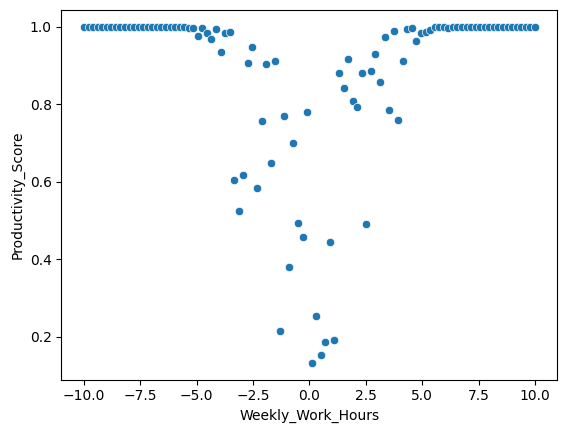

In [72]:
sns.scatterplot(data=df,x='Weekly_Work_Hours',y='Productivity_Score')

### there is no linear and montonic relationship between Weekly_Work_Hours and  Productivity_Score

In [77]:
#there is no monotonic relationship so we cannot use spearman or pearson.let's try
from scipy.stats import pearsonr
pearsonr(df['Weekly_Work_Hours'],df['Productivity_Score'])

PearsonRResult(statistic=np.float64(0.0058123232989540086), pvalue=np.float64(0.9542321736617697))

<Axes: xlabel='Stress_Level_Score', ylabel='Productivity_Score'>

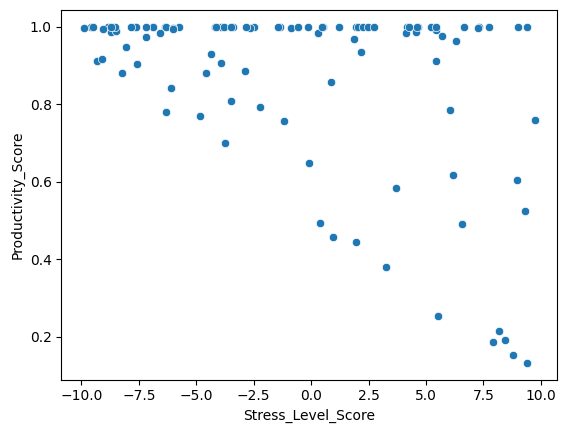

In [73]:
sns.scatterplot(data=df,x='Stress_Level_Score',y='Productivity_Score')

### there is no linear relationship between Stress_Level_Score and Productivity_Score

In [79]:
# there is no linear relationship but it seems like there is monotonic relationship so we can go witj spearman
from scipy.stats import spearmanr
spearmanr(df['Stress_Level_Score'],df['Productivity_Score'])

SignificanceResult(statistic=np.float64(-0.2521572157215721), pvalue=np.float64(0.01137677579864563))

## so it is better to go with non-linear model or model like decision tree,random forest.lets try data transformation

# Data transformation

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Weekly_Work_Hours_trans']=scaler.fit_transform(df[['Weekly_Work_Hours']])

<Axes: xlabel='Weekly_Work_Hours_trans', ylabel='Count'>

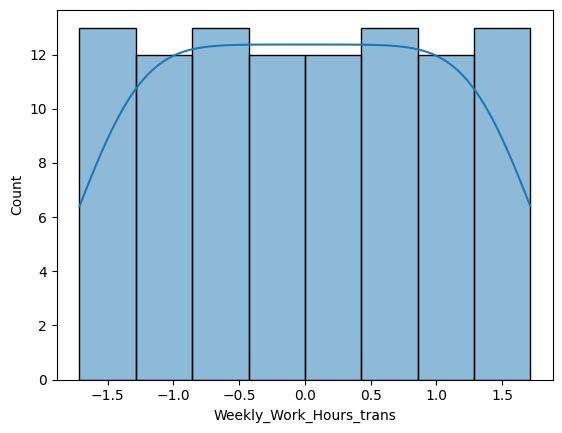

In [58]:
sns.histplot(data=df,x='Weekly_Work_Hours_trans',kde=True)

In [59]:
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='yeo-johnson',standardize=True)
df['Stress_Level_Score_trans']=transformer.fit_transform(df[['Stress_Level_Score']])

<Axes: xlabel='Stress_Level_Score_trans', ylabel='Count'>

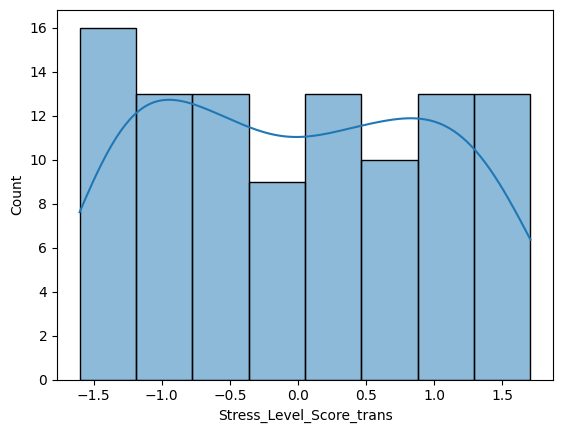

In [60]:
sns.histplot(data=df,x='Stress_Level_Score_trans',kde=True)

In [61]:
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='yeo-johnson',standardize=True)
df['Productivity_Score_trans']=transformer.fit_transform(df[['Productivity_Score']])

<Axes: xlabel='Productivity_Score_trans', ylabel='Count'>

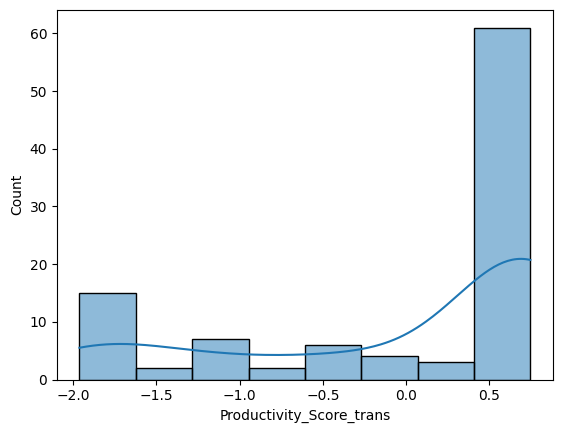

In [62]:
sns.histplot(data=df,x='Productivity_Score_trans',kde=True)

In [63]:
from scipy.stats import anderson
res=anderson(df['Weekly_Work_Hours_trans'],dist='norm')
if(res.statistic<res.critical_values[2]):
    print("Normal")
else:
    print("Not Normal")

Not Normal


In [64]:
res=anderson(df['Stress_Level_Score_trans'],dist='norm')
if(res.statistic<res.critical_values[2]):
    print("Normal")
else:
    print("Not Normal")

Not Normal


In [65]:
res=anderson(df['Productivity_Score_trans'],dist='norm')
if(res.statistic<res.critical_values[2]):
    print("Normal")
else:
    print("Not Normal")

Not Normal


# even after transforming there is no big differenece

<Axes: xlabel='Weekly_Work_Hours_trans', ylabel='Productivity_Score'>

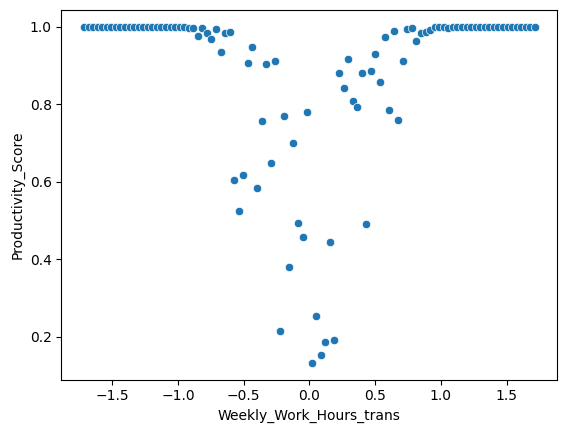

In [81]:
sns.scatterplot(data=df,x='Weekly_Work_Hours_trans',y='Productivity_Score')

<Axes: xlabel='Weekly_Work_Hours_trans', ylabel='Productivity_Score_trans'>

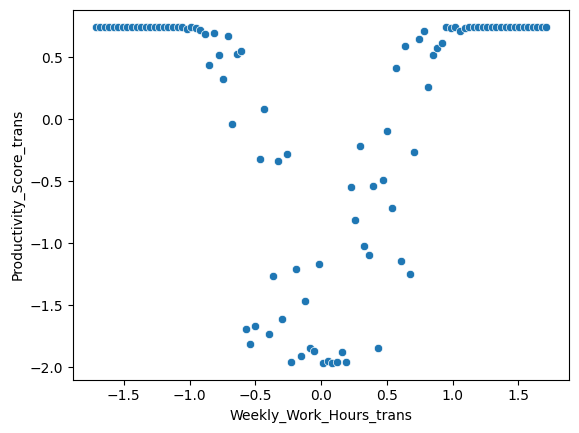

In [82]:
sns.scatterplot(data=df,x='Weekly_Work_Hours_trans',y='Productivity_Score_trans')

### there is no linear and montonic relationship between Weekly_Work_Hours and  Productivity_Score

<Axes: xlabel='Stress_Level_Score_trans', ylabel='Productivity_Score'>

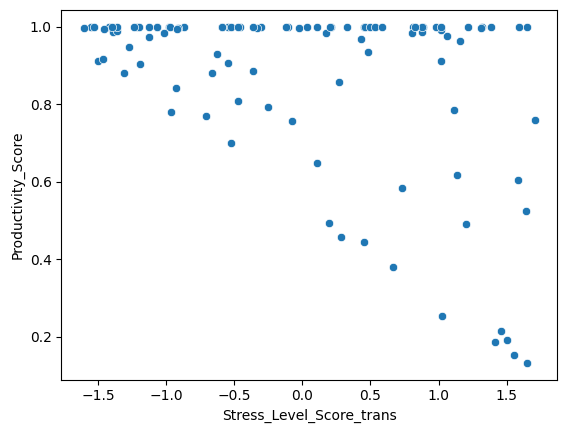

In [83]:
sns.scatterplot(data=df,x='Stress_Level_Score_trans',y='Productivity_Score')

<Axes: xlabel='Stress_Level_Score_trans', ylabel='Productivity_Score_trans'>

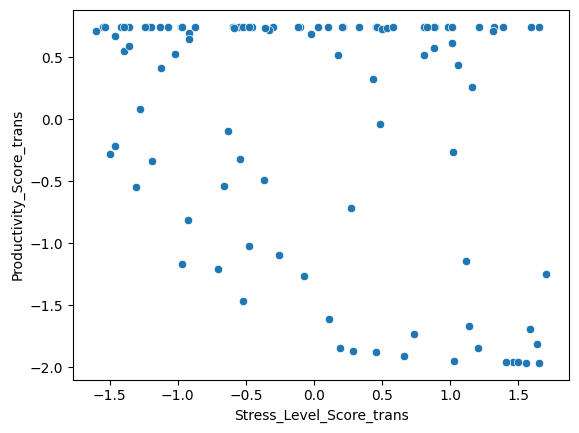

In [84]:
sns.scatterplot(data=df,x='Stress_Level_Score_trans',y='Productivity_Score_trans')

### there is no linear relationship between Stress_Level_Score and Productivity_Score

In [90]:
df.corr(method='spearman').loc[:,['Productivity_Score','Productivity_Score_trans']]

,Productivity_Score,Productivity_Score_trans
Weekly_Work_Hours,-0.003840,-0.003840
Stress_Level_Score,-0.252157,-0.252157
Productivity_Score,1.000000,1.000000
Weekly_Work_Hours_trans,-0.003840,-0.003840
Stress_Level_Score_trans,-0.252157,-0.252157
Productivity_Score_trans,1.000000,1.000000


## even after transforming there is no changes